In [0]:
#Código para permitir que o Colaboratory acesse o meu Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#1 Get Data: Leitura da Tabela  *data.csv*

A base de dados *data.csv* contém o dataset de câncer de mama da Universidade de Wisconsin (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

O dataset contém 569 instâncias e 30 atributos processados a partir de imagens digitais.

Abaixo, será apresentado três formas de carregar a base de dados:

- A base de dados localizada no Git-Hub;

- A base de dados localizada no Google Driver;

- A base de dados localizada no ambiente *Runtime* do *notebook*.

In [0]:
import pandas as pd

base = pd.read_csv("drive/My Drive/MinicursoCancer/data.csv", sep=',')

In [0]:
base2 = pd.read_csv('https://github.com/danielacbgp/Cancer/blob/master/data.csv',sep=',')

In [0]:
base3 = pd.read_csv('data.csv', sep=',')

In [0]:
#Apresenta a estrutura do Dataframe
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [0]:
#Visualiza as n instâncias do Dataframe
base.head(15)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [0]:
#colunas do dataset
base.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

#2 Clean, Prepare & Manipulate Data

##2.1 Retirando os atributos que não serão usados

O atributo **id** é o código de identificação da amostra, ele não fará parte da apredizagem e o atributo **Unnamed: 32** só possui valores *NaN*

In [0]:
colunas = ['Unnamed: 32', 'id']

base = base.drop(colunas,axis=1) #Remove a coluna Samplecode do dataset


In [0]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

##2.2 Analisando o balanceamento das classes

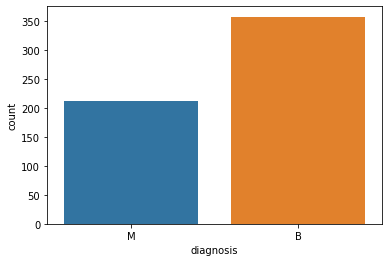

In [0]:
import matplotlib.pyplot as plt # to plot graph
import seaborn as sns # for intractve graphs
# Vamos checar a distribuição das classe
sns.countplot("diagnosis",data=base)

##2.3 Criando os conjunto X e y

O conjunto X conterá os atributos que serão treinados e o conjunto y o conjuto que será o rótulo do nosso treinamento. Neste caso o atributo **diagnosis**. 

In [0]:
X = base.drop(['diagnosis'], axis=1)
y = base['diagnosis']


##2.4 Transformando o atributo *diagnosis* que é o conjunto **y**

Cada instância (linha) do dataset tem uma das duas classes possíveis: benigna (representada por B) e maligna (representada por M)
O atributo **diagnosis** será o *label* do nosso treinamento supervisionado, então vamos renomear os valores do atributo **diagnosis** (B e M) para 0 e 1. Onde:

- 0 representa um caso benigno
- 1 representa um caso maligno


In [0]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

In [0]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

Temos 357 amostras benignas e 212 amostras malignas de câncer

##2.5 Dividindo os Dados em Treinamento (train) e Teste (test) 

Vamos divir o dataset em duas partes:

- Uma parte para treinar nosso modelo (80% da base): **train**
- Uma parte para fazer previsões e testar nosso modelo (20% da base): **test**


In [0]:
# Split dataset into treinamento (80%) and teste (20%)

from sklearn.model_selection import train_test_split
#random_state = número. Isso é útil se você deseja resultados reproduzíveis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 


In [0]:
y_test.shape

(114,)

In [0]:
y_train.shape

(455,)

##2.6 Normalizando os Dados do Conjunto X

Todos os atributos da base de treinamento e teste (**X**) serão normalizados

In [0]:
# Normalização dos dados
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#3 Train Model

##3.1 Rede Neural

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


nput_dim - número de colunas do  dataset

output_dim - número de saídas para alimentar para a camada seguinte, se houver

activation - função de ativação this case

init - a forma como os pesos devem ser fornecidos a RN

In [0]:
# Inicializando a RN
classifier = Sequential()

In [0]:

# Adicionando a camada de  input e a primeira camada oculta
#Coloque 
#output_dim = 16
#init = uniform'
#activation='relu'
#input_dim=30

classifier.add(Dense(output_dim=, init= , activation= , input_dim= )) #camada de entrada
# Adicionando dropout para prevenir overfitting
classifier.add(Dropout(p=0.1))

# Adicionando a segunda camada oculta
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

# Adicionando a camada de output
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))  #camada de saída

# Compilando a RN
#Coloque optimizer = 'adam'
#Coloque loss = 'binary_crossentropy' já que estamos trabalhando com uma classificação binaria
classifier.compile(optimizer='adam', loss='', metrics=['accuracy'])


O tamanho do batch (*batch_size*) define o número de amostras que serão propagadas através da rede.

Uma época (*nb_epoch*) é uma passagem completa por todos os dados de treinamento.

In [0]:
# Fitting a RN para o conjunto de trainamento (X)
#Tamanhno do batch e o número de épocas foi na base do "tentativa e erro"
#fit
#insira os parâmetros do fit
#batch_size=100
#nb_epochs = 150
 
classifier.fit(X_train, y_train, batch_size=, nb_epoch=)


In [0]:
#salvando o modelo
classifier.save('model_file.h5')

###3.1.1 Test Data

In [0]:
#Utilizando o modelo para fazer predições
from keras.models import load_model

classifier = load_model('model_file.h5')

In [0]:
# Predizendo o conjunto de Teste
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [0]:
import numpy as np
#matrix de confusão para uma classificação binária, retorna uma matriz onde:
# na posição 00: quantidade de true negatives
# na posição 01: quantidade de false positives
# na posição 10: quantidade de false negatives
# na posição 11: quantidade de true positives
cm = confusion_matrix(y_test, y_pred)
print("*"*40)
print(pd.DataFrame(cm, columns=['Benigno', 'Maligno'], index=['Benigno', 'Maligno']))
print("*"*40)
print("Acurácia do teste via confusion_matrix:", (cm[0,0]+cm[1,1])/np.sum(cm))


##3.2 SVM

In [0]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# define the parameters grid with NORMAL
param_grid = {'C':[10],    
             'kernel': ['rbf'],
              'random_state':  [42]
              }

# create the grid
grid_SVC = GridSearchCV(SVC(), param_grid, cv = 5, scoring= 'accuracy') 

#training
%time grid_SVC.fit(X_train, y_train)



###3.2.1 Test Data

In [0]:
#let's see the best estimator
best_SVC = grid_SVC.best_estimator_
print(best_SVC)
print("_"*40)
#with its score
print("Score da aprendizagem", np.abs(grid_SVC.best_score_))
print("*"*40)

#accuracy sobre a base test 
predictions = best_SVC.predict(X_test)
accuracy = accuracy_score(y_true = y_test, y_pred = predictions)
print("Acurácia do teste via accuracy_score:", accuracy)

import numpy as np
#matrix de confusão para uma classificação binária, retorna uma matriz onde:
# na posição 00: quantidade de true negatives
# na posição 01: quantidade de false positives
# na posição 10: quantidade de false negatives
# na posição 11: quantidade de true positives
cm = confusion_matrix(y_test, predictions)
print("*"*40)
print(pd.DataFrame(cm, columns=['Benigno', 'Maligno'], index=['Benigno', 'Maligno']))
print("*"*40)
print("Acurácia do teste via confusion_matrix:", (cm[0,0]+cm[1,1])/np.sum(cm))